# diabetes 데이터에 PCA(차원 축소)를 적용하고 시각화 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/hunei/deeplearning/diabetes.csv", index_col=0)


In [4]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


## 특성과 레이블 분리

In [9]:
X = df.drop('Outcome', axis=1) 
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [8]:
y = df.Outcome
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

## PCA 적용 => 2개로 축소 

In [11]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

## 시각화하기 

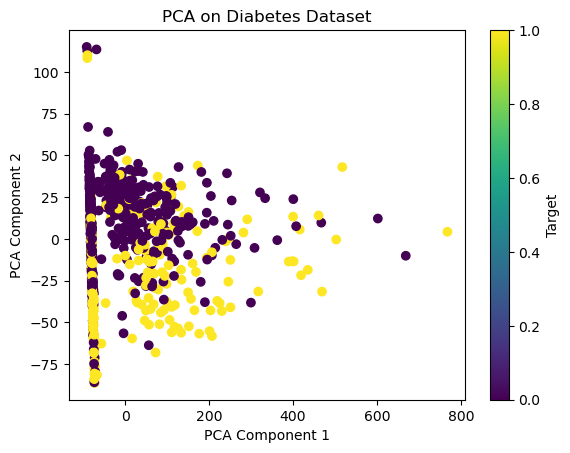

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Target')
plt.title('PCA on Diabetes Dataset')
plt.show()

# 세트 분리 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 모델 구축 및 훈련

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# DNN 모델 정의
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # PCA로 축소된 입력 크기
    Dense(64, activation='relu'),     
    Dense(32, activation='relu'),     
    Dense(1, activation='linear')     
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6338 - loss: 107.4608 - val_accuracy: 0.4390 - val_loss: 5.5886
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5243 - loss: 6.1655 - val_accuracy: 0.5772 - val_loss: 2.2663
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6447 - loss: 2.4537 - val_accuracy: 0.6179 - val_loss: 1.3585
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - loss: 1.2989 - val_accuracy: 0.6098 - val_loss: 0.9682
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5998 - loss: 0.8743 - val_accuracy: 0.5854 - val_loss: 0.6928
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6475 - loss: 0.5807 - val_accuracy: 0.6341 - val_loss: 0.5509
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6483 - loss: 0.5579 - val_accuracy: 0.6260 - val_loss: 0.5106
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6556 - loss: 0.5290 - val_accuracy: 0.6098 - val_los

## ==== PCA 적용 => 5개로 축소 ======

In [18]:
from sklearn.decomposition import PCA
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
print("PCA 적용후:", X_pca.shape)  # (442, 5) => 5개로 축소됨

PCA 적용후: (768, 5)


## 주성분 기여율

In [19]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [22]:
print(f"각각의 분산 비율 (5개의 주성분): {explained_variance_ratio}")
print(f"누적 분산 비율: {cumulative_variance[-1] * 100:.2f}%")

각각의 분산 비율 (5개의 주성분): [0.88920966 0.06160576 0.02579683 0.01306647 0.0072861 ]
누적 분산 비율: 99.70%


# 세트 분리 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 모델 구축 및 훈련

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# DNN 모델 정의
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # PCA로 축소된 입력 크기
    Dense(64, activation='relu'),     
    Dense(32, activation='relu'),     
    Dense(1, activation='linear')     
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4704 - loss: 27.1318 - val_accuracy: 0.5772 - val_loss: 5.7155
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5346 - loss: 4.5093 - val_accuracy: 0.5610 - val_loss: 2.4584
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5744 - loss: 1.8306 - val_accuracy: 0.5691 - val_loss: 1.2901
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5649 - loss: 0.9587 - val_accuracy: 0.6748 - val_loss: 1.3696
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6234 - loss: 0.9846 - val_accuracy: 0.6911 - val_loss: 0.8529
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 0.5553 - val_accuracy: 0.6748 - val_loss: 0.8224
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6350 - loss: 0.5551 - val_accuracy: 0.6992 - val_loss: 0.7450
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6654 - loss: 0.4402 - val_accuracy: 0.6667 - val_loss